I use the Pandas library to read the CSV file with the dataset and the methods head, shape and info to see how the data is structured and the data types.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("CO2_adsorption.csv")

## Data understanding

#### Data description:

This dataset was gathered from a review article containing a compilation of the results of academic papers. I focused on the three main materials target of studies since 2013, which are carbon-based, metal-organic frameworks (MOFs), and polymers (Dziejarski et al., 2023, p.3,20,36,41)

In [3]:
df.head()

,Material_replace,Material,Precursor,Conjugated microporous polymer,Activation agent,Activation temperature_°C,Activation approach,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C,Adsorption pressure_bar,Reference,Unnamed: 12,Unnamed: 13
0,0,Activated Carbon,Pomegranate peels,NaN,KOH,700.0,Wet impregnation,585.0,0.28,4.11,1,[204],NaN,NaN
1,0,Activated Carbon,Carrot peels,NaN,KOH,700.0,Wet impregnation,1379.0,0.58,4.18,1,[204],NaN,NaN
2,0,Activated Carbon,Fern leaves,NaN,KOH,700.0,Wet impregnation,1593.0,0.74,4.12,1,[204],NaN,NaN
3,0,Activated Carbon,Black locust,NaN,KOH,830.0,Wet impregnation,2064.0,0.98,3.75,1,[205],NaN,NaN
4,0,Activated Carbon,Rice husk char,NaN,KOH,780.0,Wet impregnation,2965.0,1.14,3.71,1,[206],NaN,NaN


In [4]:
df.shape

(57, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Material_replace                57 non-null     int64  
 1   Material                        57 non-null     object 
 2   Precursor                       38 non-null     object 
 3   Conjugated microporous polymer  19 non-null     object 
 4   Activation agent                17 non-null     object 
 5   Activation temperature_°C       17 non-null     float64
 6   Activation approach             17 non-null     object 
 7   BET surface area_m2/g           53 non-null     float64
 8   Total pore volume_cm3/g         43 non-null     float64
 9   CO2 uptake_mmol/g_25°C          57 non-null     float64
 10  Adsorption pressure_bar         57 non-null     int64  
 11  Reference                       57 non-null     object 
 12  Unnamed: 12                     0 non-

Since I opened this file on MS Excel, I saw that columns 12 and 13 had no content. Then, I used the unique method to certify it and posteriorly drop these columns.

In [6]:
df['Unnamed: 12'].unique(), df['Unnamed: 13'].unique()

(array([nan]), array([nan]))

In [7]:
df1 = df.drop(['Unnamed: 12', 'Unnamed: 13'], axis = 1)
df1.head()

,Material_replace,Material,Precursor,Conjugated microporous polymer,Activation agent,Activation temperature_°C,Activation approach,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C,Adsorption pressure_bar,Reference
0,0,Activated Carbon,Pomegranate peels,NaN,KOH,700.0,Wet impregnation,585.0,0.28,4.11,1,[204]
1,0,Activated Carbon,Carrot peels,NaN,KOH,700.0,Wet impregnation,1379.0,0.58,4.18,1,[204]
2,0,Activated Carbon,Fern leaves,NaN,KOH,700.0,Wet impregnation,1593.0,0.74,4.12,1,[204]
3,0,Activated Carbon,Black locust,NaN,KOH,830.0,Wet impregnation,2064.0,0.98,3.75,1,[205]
4,0,Activated Carbon,Rice husk char,NaN,KOH,780.0,Wet impregnation,2965.0,1.14,3.71,1,[206]


In [8]:
df1.shape

(57, 12)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Material_replace                57 non-null     int64  
 1   Material                        57 non-null     object 
 2   Precursor                       38 non-null     object 
 3   Conjugated microporous polymer  19 non-null     object 
 4   Activation agent                17 non-null     object 
 5   Activation temperature_°C       17 non-null     float64
 6   Activation approach             17 non-null     object 
 7   BET surface area_m2/g           53 non-null     float64
 8   Total pore volume_cm3/g         43 non-null     float64
 9   CO2 uptake_mmol/g_25°C          57 non-null     float64
 10  Adsorption pressure_bar         57 non-null     int64  
 11  Reference                       57 non-null     object 
dtypes: float64(4), int64(2), object(6)
mem

#### Exploratory Data Analysis (EDA) and Data Cleaning:

Now, I will search for missing and null values because they are part of data quality assurance. If the data is inaccurate, it can lead to incorrect analysis, conclusions, and biased results, affecting the model's performance. 

In [10]:
df1.isnull().sum()

Material_replace                   0
Material                           0
Precursor                         19
Conjugated microporous polymer    38
Activation agent                  40
Activation temperature_°C         40
Activation approach               40
BET surface area_m2/g              4
Total pore volume_cm3/g           14
CO2 uptake_mmol/g_25°C             0
Adsorption pressure_bar            0
Reference                          0
dtype: int64

For this analysis, I will focus on: 'Material_replace', 'BET surface area_m2/g', 'Total pore volume_cm3/g', 'CO2 uptake_mmol/g_25°C' and 'Adsorption pressure_bar'. The other features are redundant or specific to a unique material category. For example, 'Material' is the name of the material used in CO2 adsorption, but it is stored in the feature called 'Material_replace'. The other features are related exclusively to a specific material, such as activated-carbon or polymers.

In [11]:
df2 = df1.drop(['Material', 'Precursor', 'Conjugated microporous polymer', 'Activation agent', 'Activation temperature_°C', 'Activation approach', 'Reference'], axis = 1)
df2.head()

,Material_replace,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C,Adsorption pressure_bar
0,0,585.0,0.28,4.11,1
1,0,1379.0,0.58,4.18,1
2,0,1593.0,0.74,4.12,1
3,0,2064.0,0.98,3.75,1
4,0,2965.0,1.14,3.71,1


After running the function .isnull() again, I can see that I will have to handle missing values from 2 features ('BET surface area_m2/g' and 'Total pore volume_cm3/g').

In [12]:
df2.isnull().sum()

Material_replace            0
BET surface area_m2/g       4
Total pore volume_cm3/g    14
CO2 uptake_mmol/g_25°C      0
Adsorption pressure_bar     0
dtype: int64

In [13]:
df2.describe()

,Material_replace,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C,Adsorption pressure_bar
count,57.000000,53.000000,43.000000,57.000000,57.0
mean,1.035088,1459.184906,0.862937,2.710702,1.0
std,0.801002,944.417112,0.568819,1.741102,0.0
min,0.000000,240.000000,0.220000,0.580000,1.0
25%,0.000000,798.000000,0.505000,1.180000,1.0
50%,1.000000,1384.000000,0.740000,2.040000,1.0
75%,2.000000,1906.000000,1.019000,4.180000,1.0
max,2.000000,5290.000000,2.810000,6.180000,1.0


Evaluating the descriptive statistics is possible to see that the data is skewed. But I will verify it because I need to confirm whether I will replace the missing values with mean, median, or even interpolation values. When the data has a normal distribution I can replace the values with mean; otherwise, I must use median or interpolation. 

<Axes: xlabel='BET surface area_m2/g', ylabel='Count'>

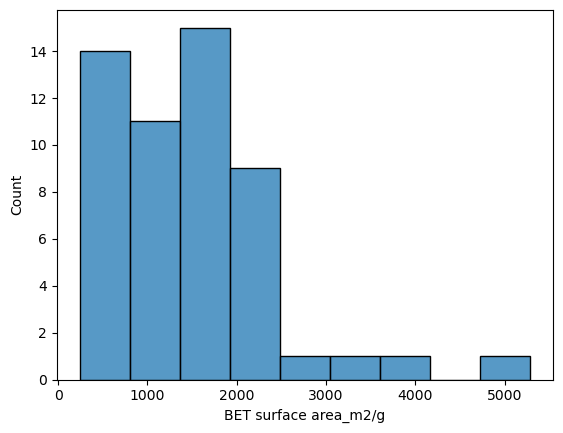

In [14]:
import seaborn as sns
sns.histplot(data=df2, x="BET surface area_m2/g")

<Axes: xlabel='Total pore volume_cm3/g', ylabel='Count'>

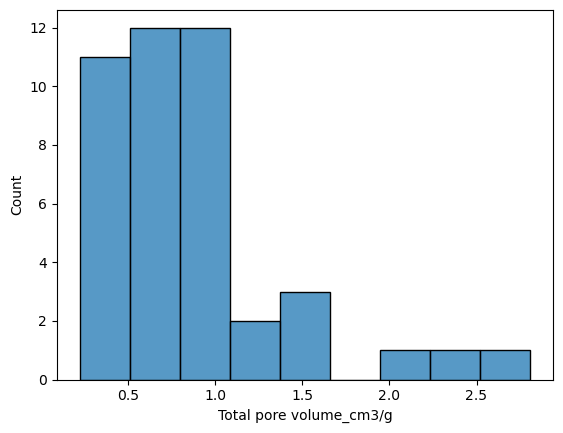

In [15]:
sns.histplot(data=df2, x="Total pore volume_cm3/g")

<Axes: >

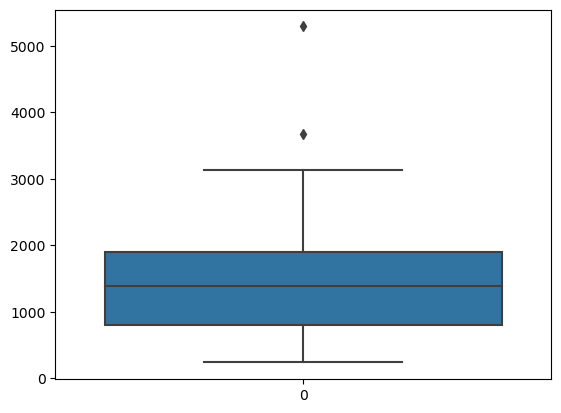

In [16]:
sns.boxplot(data=df2["BET surface area_m2/g"])

<Axes: >

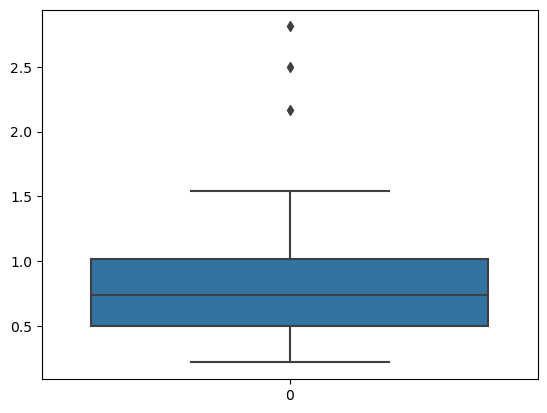

In [17]:
sns.boxplot(data=df2["Total pore volume_cm3/g"])

The histograms confirmed that these features are skewed, and the boxplot shows the presence of outliers in the features. Thus, in this case, I will input the missing values with interpolation because this method is more robust to outliers than the median.

In [18]:
df3 = df2.interpolate(method="linear", axis=0, subset=["BET surface area_m2/g", "Total pore volume_cm3/g"])

In [19]:
df3.head()

,Material_replace,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C,Adsorption pressure_bar
0,0,585.0,0.28,4.11,1
1,0,1379.0,0.58,4.18,1
2,0,1593.0,0.74,4.12,1
3,0,2064.0,0.98,3.75,1
4,0,2965.0,1.14,3.71,1


In [20]:
df3.isnull().sum()

Material_replace           0
BET surface area_m2/g      0
Total pore volume_cm3/g    0
CO2 uptake_mmol/g_25°C     0
Adsorption pressure_bar    0
dtype: int64

In [21]:
df3.shape

(57, 5)

Now, the dataset is clean and is named as 'df3'.

Checking for duplicates is essential to maintain data integrity. Otherwise, it can lead to inaccurate results. Thus, I used the duplicated() method to identify duplicates, which resulted in zero duplicates.

In [22]:
df3.duplicated().sum()

0

Now, I will calculate the Interquartile Range (IQR) using the function below. Then, I will check for outliers and verify if I can remove them without losing the data integrity.

In [23]:
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1

In [24]:
df_outliers = df3[~((df3<(Q1-1.5*IQR))|(df3>Q3+1.5*IQR)).any(axis=1)]
df_outliers.shape

(53, 5)

After discovering that 7% of the data are outliers, a significant amount, I decided not to remove them; otherwise, I could lose the data integrity. I will search for a robust ML model that can handle it.

#### Descriptive Statistic:

I will use the funcition.describe() to call the summary statistics parameters, such as mean, median, and standard deviation.

In [25]:
df3.describe()

,Material_replace,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C,Adsorption pressure_bar
count,57.000000,57.000000,57.000000,57.000000,57.0
mean,1.035088,1420.885965,0.835345,2.710702,1.0
std,0.801002,940.609642,0.509640,1.741102,0.0
min,0.000000,240.000000,0.220000,0.580000,1.0
25%,0.000000,772.000000,0.500000,1.180000,1.0
50%,1.000000,1379.000000,0.882000,2.040000,1.0
75%,2.000000,1906.000000,0.980000,4.180000,1.0
max,2.000000,5290.000000,2.810000,6.180000,1.0


##### Sparsity of the data
Sparse datasets are characterized by most features having 0 most of the time (Müller and Guido, 2017 p.44) and the sparsity is a measurement of how sparse or dense a dataset is. It can be represented as the ratio of the number of zero or missing values to the total number of data points or entries in the dataset. 

In [26]:
missing_values = df3.isnull().sum().sum()
zero_values = (df3 == 0).sum().sum()

total_data_points = df3.size

sparsity = (missing_values + zero_values) / total_data_points

print(f"Sparsity of the dataset: {sparsity:.3f}")

Sparsity of the dataset: 0.060


In [27]:
print("Missing values: ", missing_values)
print("zero_values: ", zero_values)

Missing values:  0
zero_values:  17


The sparsity values must be between 0 and 1 when 0 indicates no sparsity, and 1 indicates completely spaced. The result for this dataset was found to be 0.060, meaning that the dataset is not sparse. Thus, this data does not have a significant portion of missing or zero values.

As I already handled the missing values, it is only missing handling these zero_values that came from the 'material_replace' feature used to encode the material's class. I  will use the one-hot encoding method in the preprocessing phase to avoid adding different weights for each material class. However, the dataset might remain sparse due to the One-hot encoding process that automatically generate a lot of zeros.

The charts below (pair plot and heatmap) show the relation between features and their strength and direction of the relationship. I dropped these features ('Material_replace' and 'Adsorption pressure_bar') because they do not provide essential information, like 'Adsorption pressure_bar' that has the same value for all rows, and 'Material_replace' is a representation of a categorical feature.

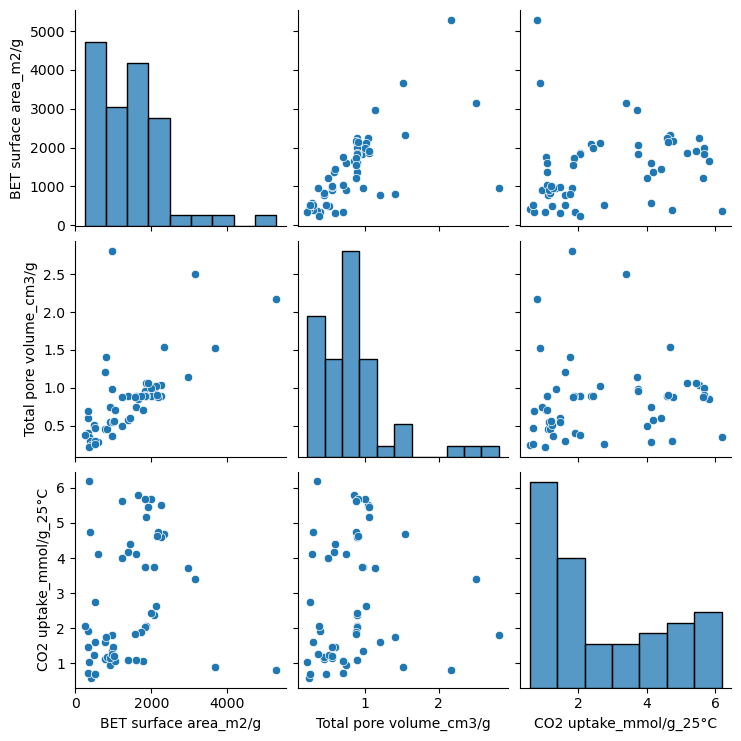

In [28]:
df3_plot = df3.drop(['Material_replace', 'Adsorption pressure_bar'], axis=1)
sns.pairplot(df3_plot)

,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C
BET surface area_m2/g,1.000000,0.659264,0.227061
Total pore volume_cm3/g,0.659264,1.000000,0.084840
CO2 uptake_mmol/g_25°C,0.227061,0.084840,1.000000


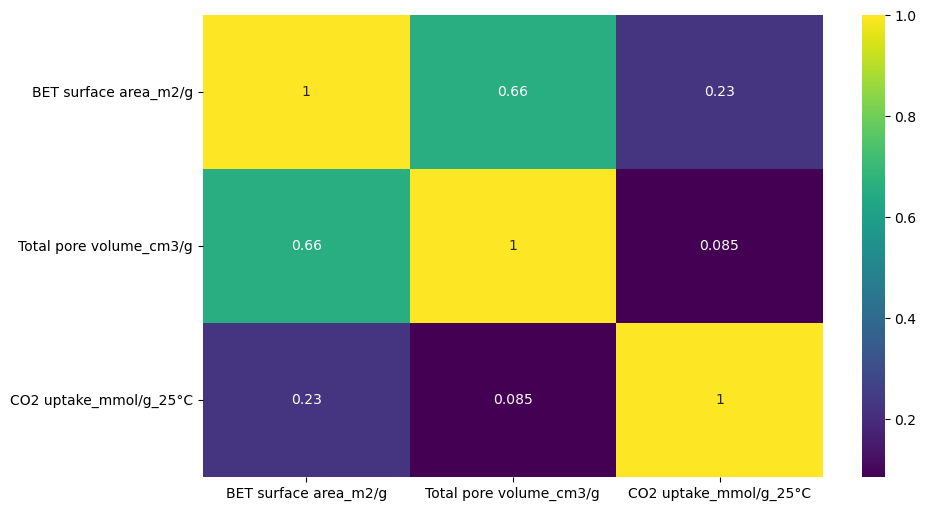

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6)) 
c= df3_plot.corr() 
sns.heatmap(c,cmap="viridis",annot=True) 
c

#### Inferential Statistics:

##### Hypothesis test

In this case, I will apply the Kruskal-Wallis test because it is appropriate when handling a non-normal distribution and small sample size (Devore, 2012, p.645), conditions that I encountered in this dataset.  

*Hypothesis:*
    
$H_0$: There is no difference between the means.

$H_A$: There is a difference between the means.
  
Considering 95% of confidence level and 𝛼 = 0.05 I will calculate the p-value to know if there is a significant difference between the $CO_2$ adsorption for each material. 

In [30]:
df3.head()

,Material_replace,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C,Adsorption pressure_bar
0,0,585.0,0.28,4.11,1
1,0,1379.0,0.58,4.18,1
2,0,1593.0,0.74,4.12,1
3,0,2064.0,0.98,3.75,1
4,0,2965.0,1.14,3.71,1


In [31]:
from scipy.stats import kruskal

material_0 = df3[df3['Material_replace'] == 0]['CO2 uptake_mmol/g_25°C']
material_1 = df3[df3['Material_replace'] == 1]['CO2 uptake_mmol/g_25°C']
material_2 = df3[df3['Material_replace'] == 2]['CO2 uptake_mmol/g_25°C']

h_statistic, p_value = kruskal(material_0, material_1, material_2)

print("H-Statistic:", h_statistic)
print("P-Value:", p_value)

H-Statistic: 27.36766992935005
P-Value: 1.140738196109236e-06


As we can see above, the p-value is less than 𝛼, thus I can reject the null hypothesis, suggesting a significant difference among at least one pair of materials regarding $CO_2$ adsorption. After performing the Dunn test to identify which specific pairs of materials are different, I found that all of them are significantly different, considering the p-values less than 0.05. The result is illustrated below in a chart.

In [32]:
import scikit_posthocs as sp

# Combine data into a list of lists
all_data = [material_0, material_1, material_2]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*all_data)

# Check if the overall Kruskal-Wallis test is significant
if p_value < 0.05:
    # Perform Dunn post-hoc test for pairwise comparisons
    results = sp.posthoc_dunn(all_data, p_adjust='bonferroni')
    print("Dunn Test Results:")
    print(results)
else:
    print("No significant difference in the Kruskal-Wallis test.")


Dunn Test Results:
              1         2             3
1  1.000000e+00  0.007996  5.168780e-07
2  7.996149e-03  1.000000  4.706746e-02
3  5.168780e-07  0.047067  1.000000e+00


In [33]:
import numpy as np

# Material 0:
mean_material_0 = np.mean(material_0)
std_dev_material_0 = np.std(material_0, ddof=1)

# Material 1:
mean_material_1 = np.mean(material_1)
std_dev_material_1 = np.std(material_1, ddof=1)

# Material 2:
mean_material_2 = np.mean(material_2)
std_dev_material_2 = np.std(material_2, ddof=1)

print(mean_material_0, std_dev_material_0)
print(mean_material_1, std_dev_material_1)
print(mean_material_2, std_dev_material_2)

4.4682352941176475 0.933322260088374
2.588571428571429 1.7475276413101044
1.273157894736842 0.384188215325928


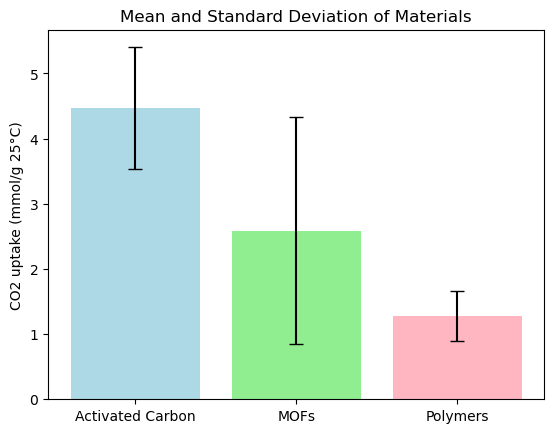

In [34]:
materials = ['Activated Carbon', 'MOFs', 'Polymers']
means = [mean_material_0, mean_material_1, mean_material_2]
std_devs = [std_dev_material_0, std_dev_material_1, std_dev_material_2]

fig, ax = plt.subplots()
ax.bar(materials, means, yerr=std_devs, capsize=5, color=['lightblue', 'lightgreen', 'lightpink'])
ax.set_ylabel('CO2 uptake (mmol/g 25°C)')
ax.set_title('Mean and Standard Deviation of Materials')
plt.show()

## Data Preparation

### Preprocessing:

In this phase, I will preprocess the data, making them suitable for the ML model, like standardizing all features to be on the same scale to reduce memory and time consumption and avoid missed calculations. I will also use one-hot encoding to avoid attributing weight to the categories, avoiding that one material has more advantages.

##### One-hot encoding

I will use the pd.get_dummies function from the panda's library to perform the one-hot encoding. 

In [35]:
df_encod = pd.get_dummies(df3, columns=['Material_replace'])
df_encod.head()

,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C,Adsorption pressure_bar,Material_replace_0,Material_replace_1,Material_replace_2
0,585.0,0.28,4.11,1,1,0,0
1,1379.0,0.58,4.18,1,1,0,0
2,1593.0,0.74,4.12,1,1,0,0
3,2064.0,0.98,3.75,1,1,0,0
4,2965.0,1.14,3.71,1,1,0,0


In [36]:
df_encod.shape

(57, 7)

In [37]:
missing_values = df_encod.isnull().sum().sum()
zero_values = (df_encod == 0).sum().sum()

total_data_points = df_encod.size

sparsity = (missing_values + zero_values) / total_data_points

print(f"Sparsity of the dataset: {sparsity:.3f}")

Sparsity of the dataset: 0.286


In [38]:
print("Missing values: ", missing_values)
print("zero_values: ", zero_values)

Missing values:  0
zero_values:  114


As we can see in the results above, the sparsity increased 4.8 times after the one-hot encoding; however, it is necessary not to add weight to categories in the material feature.

##### Standardization

Standardization is a common preprocessing for many ML models; however, in the presence of outliers, generally necessary robust methods to handle it, such as the RobustScaler function that considers the median and the interquartile range (sci-kit-learn, n.d.). As I identified that this dataset contains 7% outliers, I will use the RobustScaler to deal with these outliers.

Before starting the normalization, I will drop the columns of materials because they result from one-hot encoding and, therefore, already have values between zero and one. I will also drop the column 'Adsorption pressure_bar' because its value is 1 for all records. 

In [39]:
df_norm = df_encod.drop(columns=["Material_replace_0", "Material_replace_1", "Material_replace_2", "Adsorption pressure_bar"])
df_norm.head()

,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C
0,585.0,0.28,4.11
1,1379.0,0.58,4.18
2,1593.0,0.74,4.12
3,2064.0,0.98,3.75
4,2965.0,1.14,3.71


I will use the function RobustScaler from the SKlearn library to standardize the data.

In [40]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_norm)

In [41]:
print(scaled_data)

[[-7.00176367e-01 -1.25416667e+00  6.90000000e-01]
 [ 0.00000000e+00 -6.29166667e-01  7.13333333e-01]
 [ 1.88712522e-01 -2.95833333e-01  6.93333333e-01]
 [ 6.04056437e-01  2.04166667e-01  5.70000000e-01]
 [ 1.39858907e+00  5.37500000e-01  5.56666667e-01]
 [ 1.55202822e+00  3.37083333e+00  4.53333333e-01]
 [ 2.32804233e-01 -5.20833333e-02  1.25333333e+00]
 [ 3.95061728e-01  1.62500000e-01  5.63333333e-01]
 [ 7.68959436e-01  3.29166667e-01  1.15666667e+00]
 [ 6.55643739e-01  2.85416667e-01  1.96666667e-01]
 [ 5.42328042e-01  2.41666667e-01  1.21000000e+00]
 [ 4.08289242e-01  5.83333333e-02  1.21000000e+00]
 [ 4.31216931e-01  3.70833333e-01  1.04333333e+00]
 [ 4.64726631e-01  3.70833333e-01  1.13333333e+00]
 [ 8.43033510e-01  1.37083333e+00  8.76666667e-01]
 [ 5.29100529e-02 -5.87500000e-01  7.86666667e-01]
 [-1.41975309e-01 -7.95833333e-01  6.53333333e-01]
 [-5.28747795e-01 -9.00833333e-01 -3.10000000e-01]
 [-9.15520282e-01 -1.00583333e+00 -4.66666667e-02]
 [-8.94885362e-01 -1.11083333e+

##### Balanced class

According to the function below, the data do not have a significantly imbalanced class; however, I will adjust the 'average' parameter to ensure it will not interfere with the models' performance.

In [42]:
df3["Material_replace"].value_counts()

1    21
2    19
0    17
Name: Material_replace, dtype: int64

## Machine Learning implementation

### k-Nearest Neighbors (k-NN)
I choose to use this model because it can be applied to datasets with any number of classes and often gives a reasonable performance without complex adjustments (Müller and Guido, 2017, p.36,44).

Below, I will convert the array of the data standardized into a dataframe to posteriorly merge the columns dropped earlier. The new dataset will named 'df_ml'. 

In [43]:
import numpy as np
array_data = np.array(scaled_data)
column_labels = ['BET surface area_m2/g', 'Total pore volume_cm3/g', 'CO2 uptake_mmol/g_25°C']
df_ar = pd.DataFrame(array_data, columns=column_labels)
df_ar.head()

,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C
0,-0.700176,-1.254167,0.690000
1,0.000000,-0.629167,0.713333
2,0.188713,-0.295833,0.693333
3,0.604056,0.204167,0.570000
4,1.398589,0.537500,0.556667


In [44]:
df_ml = pd.merge(df_ar, df_encod[["Material_replace_0", "Material_replace_1", "Material_replace_2"]], left_index=True, right_index=True, how='left')
df_ml.head()

,BET surface area_m2/g,Total pore volume_cm3/g,CO2 uptake_mmol/g_25°C,Material_replace_0,Material_replace_1,Material_replace_2
0,-0.700176,-1.254167,0.690000,1,0,0
1,0.000000,-0.629167,0.713333,1,0,0
2,0.188713,-0.295833,0.693333,1,0,0
3,0.604056,0.204167,0.570000,1,0,0
4,1.398589,0.537500,0.556667,1,0,0


Now, I will prepare the data to split for performing the k-NN.

The target variable will be the 'Material_replace' because I want to identify which material can be suitable given a certain amount of CO2 uptake desired by the industry. 

First, I will define the X and y variables. Then, I used the 'idxmax' to flatten the target variable without introducing different weights to the classes.

In [45]:
X = df_ml.drop(["Material_replace_0", "Material_replace_1", "Material_replace_2"], axis=1)
y = df_ml[["Material_replace_0", "Material_replace_1", "Material_replace_2"]]

y = y.idxmax(axis=1)

I will Split the data into train and test sets.

In [46]:
from sklearn.model_selection import train_test_split, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=63)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 3), (12, 3), (45,), (12,))

I will initialize the k-NN classifiers and then use the Cross-Validation to reduce the possibility of bias in the model performance, as it is a statistical method used to assess the performance of a machine learning model by splitting the dataset into multiple subsets (folds) that will be trained and evaluating the model on different combinations of these folds (Müller and Guido, 2017, p.253).

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, metric="manhattan")

y_pred_train = cross_val_predict(knn, X_train, y_train, cv=5)

I will fit the model on the training set and make predictions on the test set.

In [48]:
knn.fit(X_train, y_train)

y_pred_test = knn.predict(X_test)

###### Metrics for training set

I will calculate the metrics (accuracy, precision, recall and F1-score) for the training and test set to evaluate the models' performance. I will also use the "average='weighted'" to ensure that the metrics will not dominate in the majority class compared to the minority because there is a slight difference between the classes, and as I am using a small dataset, it could make a significant difference.

Metrics for Training set:
Accuracy: 0.7778
Precision: 0.7760
Recall: 0.7778
F1 Score: 0.7703

Confusion Matrix:


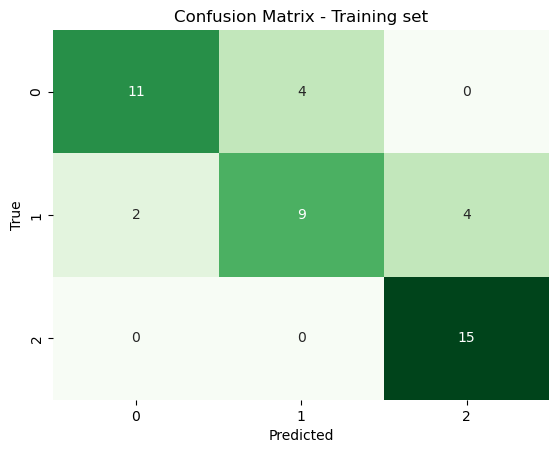

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average='weighted')
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print("Metrics for Training set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print("\nConfusion Matrix:")

cm_train = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.title('Confusion Matrix - Training set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###### Metrics for test set


Metrics for Test set:
Accuracy: 0.6667
Precision: 0.8889
Recall: 0.6667
F1 Score: 0.6667

Confusion Matrix:


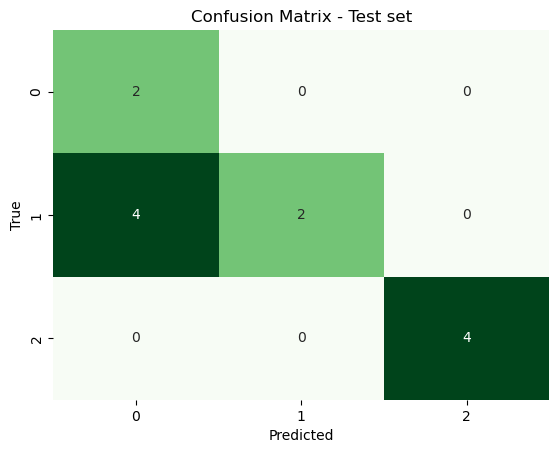

In [50]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("\nMetrics for Test set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print("\nConfusion Matrix:")

cm_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_test, annot=True, cmap='Greens', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Evaluation - kNN

+------------+---------+--------+
| 10% test   |   Train |   Test |
+============+=========+========+
| Accuracy   |  0.7451 | 0.8333 |
+------------+---------+--------+
| Precision  |  0.7489 | 0.9167 |
+------------+---------+--------+
| Recall     |  0.7451 | 0.8333 |
+------------+---------+--------+
| F1 Score   |  0.7348 | 0.8333 |
+------------+---------+--------+
+------------+---------+--------+
| 20% test   |   Train |   Test |
+============+=========+========+
| Accuracy   |  0.7111 | 0.6667 |
+------------+---------+--------+
| Precision  |  0.704  | 0.8889 |
+------------+---------+--------+
| Recall     |  0.7111 | 0.6667 |
+------------+---------+--------+
| F1 Score   |  0.6978 | 0.6667 |
+------------+---------+--------+
+------------+---------+--------+
| 30% test   |   Train |   Test |
+============+=========+========+
| Accuracy   |  0.7436 | 0.5556 |
+------------+---------+--------+
| Precision  |  0.7433 | 0.7389 |
+------------+---------+--------+
| Recall     |

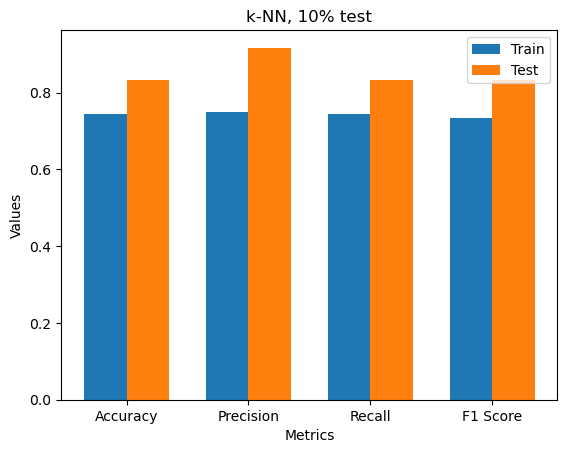

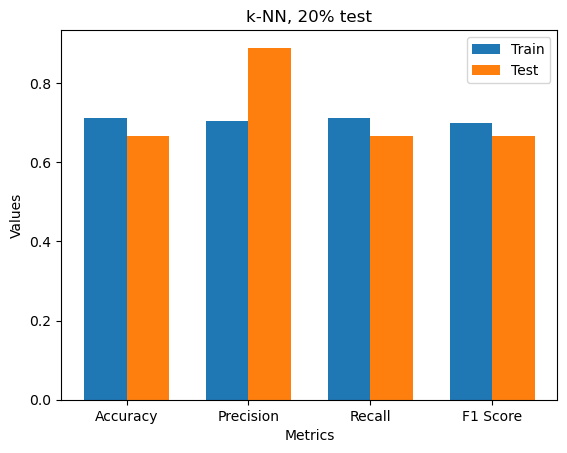

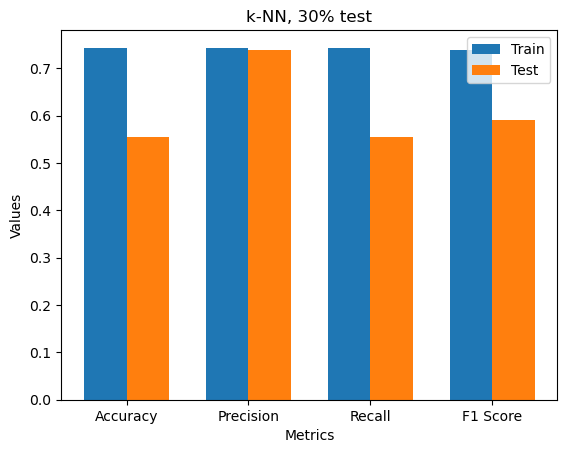

In [51]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np

data = [
    ["Accuracy", 0.7451, 0.8333],
    ["Precision", 0.7489, 0.9167],
    ["Recall", 0.7451, 0.8333],
    ["F1 Score", 0.7348, 0.8333],
]   
headers = ["10% test", "Train", "Test"]

data1 = [
    ["Accuracy", 0.7111, 0.6667],
    ["Precision", 0.7040, 0.8889],
    ["Recall", 0.7111, 0.6667],
    ["F1 Score", 0.6978, 0.6667],
]   
headers1 = ["20% test", "Train", "Test"]

data2 = [
    ["Accuracy", 0.7436, 0.5556],
    ["Precision", 0.7433, 0.7389],
    ["Recall", 0.7436, 0.5556],
    ["F1 Score", 0.7384, 0.5915],
]   
headers2 = ["30% test", "Train", "Test"]
print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print(tabulate(data2, headers=headers2, tablefmt="grid"))

def plot_data(data, headers, title):
    categories = [row[0] for row in data]
    values_train = [row[1] for row in data]
    values_test = [row[2] for row in data]

    bar_width = 0.35
    index = np.arange(len(categories))

    fig, ax = plt.subplots()
    train_bars = ax.bar(index, values_train, bar_width, label="Train")
    test_bars = ax.bar(index + bar_width, values_test, bar_width, label="Test")

    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

plot_data(data, headers, "k-NN, 10% test")
plot_data(data1, headers1, "k-NN, 20% test")
plot_data(data2, headers2, "k-NN, 30% test")

Using the default parameters, I obtained overfitting in all metrics when I split the test into 10%. In 20%, it happened only in the precision metric, meaning that the model memorised the positive instances but generalised well when considering the other metrics. The same occurred in the 30% split but with more differences between the training and test sets; however, these results decreased compared to the 20%. Because of this, I will use the 20% percentage split for the hyperparameters adjustment in the next step.

#### Adjusting hyperparameters

Now, I will focus on the 20% test split to assess the hyperparameters in this model to try to improve the model's performance.

The k-NN classifier has two essential parameters: the number of neighbors and the distance measurement between data points (Müller and Guido, 2017, p.44). Regarding the number of neighbours (chart below), I found that the number 3 is the best in this case because it is reasonably accurate and is not overfitted. 

Considering the distance measurement, they resulted in reasonable accuracy and generalization. The distance metric did not influence the test set; however, Manhattan performed better than the other metrics in the training set (chart below).

+---------------------+---------+--------+
|   Accuracy, 20%test |   Train |   Test |
+=====================+=========+========+
|                   1 |  0.6889 | 0.75   |
+---------------------+---------+--------+
|                   2 |  0.6    | 0.5833 |
+---------------------+---------+--------+
|                   3 |  0.7111 | 0.6667 |
+---------------------+---------+--------+
|                   4 |  0.6444 | 0.5833 |
+---------------------+---------+--------+
|                   5 |  0.7111 | 0.6667 |
+---------------------+---------+--------+


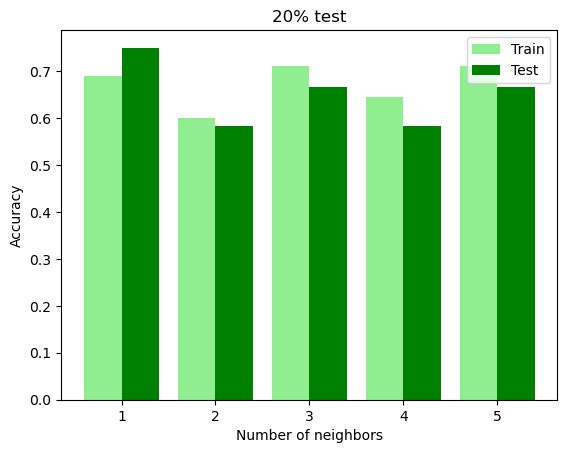

In [52]:
data = [
    ["1", 0.6889, 0.7500],
    ["2", 0.6000, 0.5833],
    ["3", 0.7111, 0.6667],
    ["4", 0.6444, 0.5833],
    ["5", 0.7111, 0.6667],
]   
headers = ["Accuracy, 20%test", "Train", "Test"]

print(tabulate(data, headers=headers, tablefmt="grid"))

def plot_data(data, headers, title):
    categories = [row[0] for row in data]
    values_train = [row[1] for row in data]
    values_test = [row[2] for row in data]

    bar_width = 0.4
    index = np.arange(len(categories))

    fig, ax = plt.subplots()
    train_bars = ax.bar(index, values_train, bar_width, color="lightgreen", label="Train")
    test_bars = ax.bar(index + bar_width, values_test, bar_width, color="green", label="Test")

    ax.set_xlabel("Number of neighbors")
    ax.set_ylabel("Accuracy")
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

plot_data(data, headers, "20% test")

+---------------------+---------+--------+
| Accuracy, 30%test   |   Train |   Test |
+=====================+=========+========+
| euclidean           |  0.7111 | 0.6667 |
+---------------------+---------+--------+
| manhattan           |  0.7778 | 0.6667 |
+---------------------+---------+--------+
| chebyshev           |  0.7111 | 0.6667 |
+---------------------+---------+--------+


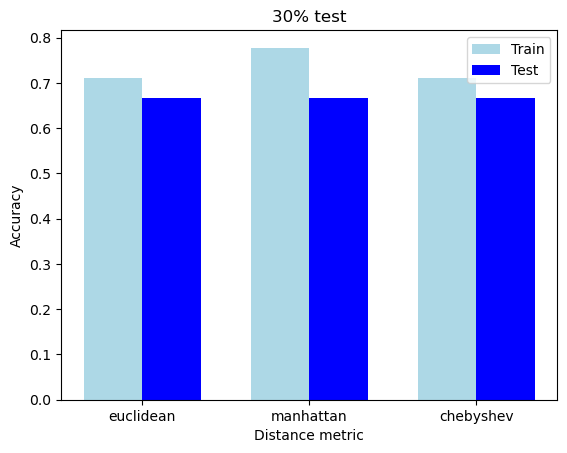

In [53]:
data = [
    ["euclidean", 0.7111, 0.6667],
    ["manhattan", 0.7778, 0.6667],
    ["chebyshev", 0.7111, 0.6667],
]   
headers = ["Accuracy, 30%test", "Train", "Test"]

print(tabulate(data, headers=headers, tablefmt="grid"))

def plot_data(data, headers, title):
    categories = [row[0] for row in data]
    values_train = [row[1] for row in data]
    values_test = [row[2] for row in data]

    bar_width = 0.35
    index = np.arange(len(categories))

    fig, ax = plt.subplots()
    train_bars = ax.bar(index, values_train, bar_width, color="lightblue", label="Train")
    test_bars = ax.bar(index + bar_width, values_test, bar_width, color="blue", label="Test")

    ax.set_xlabel("Distance metric")
    ax.set_ylabel("Accuracy")
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

plot_data(data, headers, "30% test")

The chart below shows that using the 'manhattan' distance metric, the training set slightly improved compared to 'euclidean' and 'chebyshev' metrics. Therefore, at the moment, it is the best set that I could achieve with these adjustments.

+------------+---------+--------+
| 20% test   |   Train |   Test |
+============+=========+========+
| Accuracy   |  0.7778 | 0.6667 |
+------------+---------+--------+
| Precision  |  0.7766 | 0.8889 |
+------------+---------+--------+
| Recall     |  0.7778 | 0.6667 |
+------------+---------+--------+
| F1 Score   |  0.7703 | 0.6667 |
+------------+---------+--------+


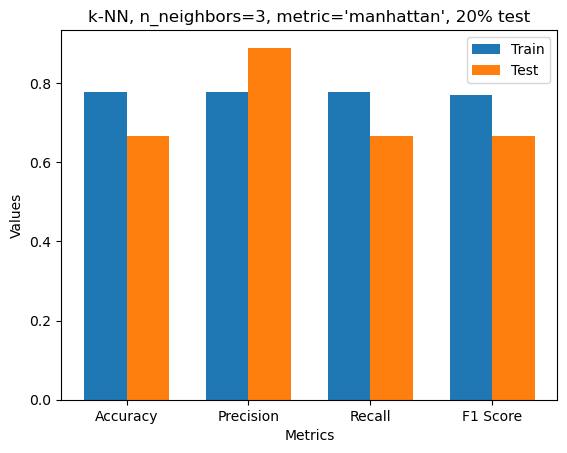

In [54]:
data = [
    ["Accuracy", 0.7778, 0.6667],
    ["Precision", 0.77660, 0.8889],
    ["Recall", 0.7778, 0.6667],
    ["F1 Score", 0.7703, 0.6667],
]   
headers = ["20% test", "Train", "Test"]

print(tabulate(data, headers=headers, tablefmt="grid"))


def plot_data(data, headers, title):
    categories = [row[0] for row in data]
    values_train = [row[1] for row in data]
    values_test = [row[2] for row in data]

    bar_width = 0.35
    index = np.arange(len(categories))

    fig, ax = plt.subplots()
    train_bars = ax.bar(index, values_train, bar_width, label="Train")
    test_bars = ax.bar(index + bar_width, values_test, bar_width, label="Test")

    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

plot_data(data, headers, "k-NN, n_neighbors=3, metric='manhattan', 20% test")

## kNN - SMOTE 

The Synthetic Minority Over-sampling Technique (SMOTE) is an algorithm that can be used to generate synthetic data to provide new related information on the positive class to the learning algorithm (Chawla, 2009, p.880).

I will use the SMOTE balance the classes and try to imporeve the models performanceI will use the SMOTE to balance the classes and try to improve the k-NN's performance.

In [55]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 3), (12, 3), (45,), (12,))

I am Applying SMOTE to the training set only. If I apply it to the entire dataset, it will result in an overfit of the negative class, which will generate excellent metrics but not in accordance with the real dataset.

In [56]:
smote = SMOTE(random_state=51)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((48, 3), (48,))

I will use the code below to call the Gradient Boosting Classifier with the data balanced (SMOTE), and then I will train the model using the training sets and make predictions on the test set.

In [57]:
knn_smote = KNeighborsClassifier(n_neighbors=3, metric="manhattan")

y_train_pred = cross_val_predict(knn_smote, X_train_resampled, y_train_resampled, cv=5)

In [58]:
knn_smote.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

Making predictions on the test set.

In [59]:
y_pred_smote_knn = knn_smote.predict(X_test)

####  Metrics - SMOTE - kNN

In [60]:
from sklearn import metrics

print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_smote_knn)) )
print( "precision: {:.2f}".format(metrics.precision_score(y_test, y_pred_smote_knn, average='weighted')) )
print( "recall: {:.2f}".format(metrics.recall_score(y_test, y_pred_smote_knn, average='weighted')) )
print( "F1 Score: {:.2f}".format(metrics.f1_score(y_test, y_pred_smote_knn, average='weighted')) )

Accuracy: 0.67
precision: 0.57
recall: 0.67
F1 Score: 0.61


C:\Users\danie\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####  Accuracy - SMOTE - kNN - train and test

In [61]:
print("Training Accuracy :", knn_smote.score(X_train, y_train))
print("Testing Accuracy :", knn_smote.score(X_test, y_test))

Training Accuracy : 0.8444444444444444
Testing Accuracy : 0.6666666666666666


Text(50.72222222222221, 0.5, 'Actual')

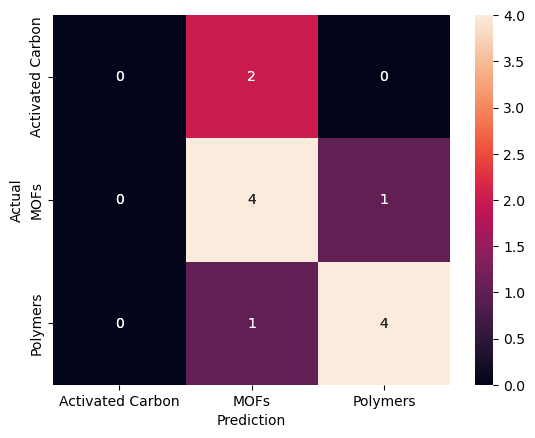

In [62]:
cm = confusion_matrix(y_test, y_pred_smote_knn)
sns.heatmap(cm, annot=True)
ax = sns.heatmap(cm, annot=True,                  
                 xticklabels=['Activated Carbon', 'MOFs', 'Polymers'],                
                 yticklabels=['Activated Carbon', 'MOFs', 'Polymers'],                  
                 cbar=False)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

After applying the SMOTE in the k-NN model, I realized that this tool did not promote enhancements in the model performance. Inclusive seems overfitting because the training accuracy is too high (0.84) and the test is not (0.67). Generally, it indicates that the training set learned the data too well, including its noises, and performs poorly in new data. 

### Gradient boosted regression trees
I chose to use this model as an alternative to k-NN, which did not improve after extensive adjustments.

Gradient Boosting is considered a powerful model due to its approach to building serial trees that try to correct the mistakes of the previous one; in addition, it is more sensitive than random forest and can provide better accuracy with the correct setting (Müller and Guido, 2017, p.88,89).

I will use the scaled data because there is no difference in the model's performance between scaled and non-scaled data. 

I will prepare the data to split for performing the Gradient Boosting.

First, I will define the X and y variables. Then, I used the 'idxmax' to flatten the target variable without introducing different weights to the classes.

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = df_ml.drop(["Material_replace_0", "Material_replace_1", "Material_replace_2"], axis=1)
y = df_ml[["Material_replace_0", "Material_replace_1", "Material_replace_2"]]

y = y.idxmax(axis=1)

I will Split the data into train and test sets.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 3), (12, 3), (45,), (12,))

I will initialize the Gradient Boosting classifiers and then use the Cross-Validation as I did in the previous model. 

In [65]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=2, random_state=12)

y_train_pred = cross_val_predict(gb_clf, X_train, y_train, cv=5)

I will fit the model on the training set and make predictions on the training and test set.

In [66]:
gb_clf.fit(X_train, y_train)

y_train_pred = gb_clf.predict(X_train)

y_test_pred = gb_clf.predict(X_test)

###### Metrics for training set

Training Set Metrics:
Accuracy: 0.9555555555555556
Precision: 0.960233918128655
Recall: 0.9555555555555556
F1-Score: 0.9549382716049383


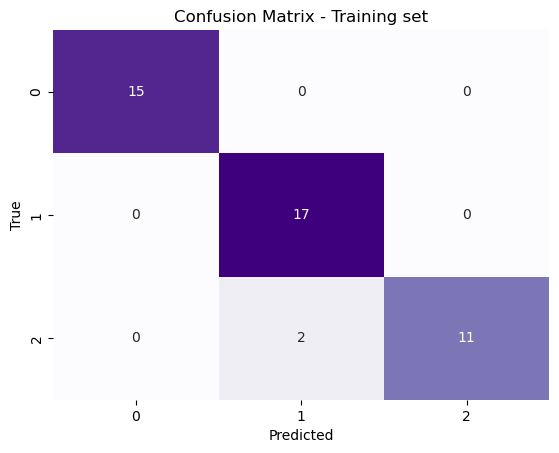

In [67]:
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("F1-Score:", f1_score(y_train, y_train_pred, average='weighted'))

cm_test = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_test, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.title('Confusion Matrix - Training set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###### Metrics for test set


Test Set Metrics:
Accuracy: 0.75
Precision: 0.8571428571428571
Recall: 0.75
F1-Score: 0.7424242424242425


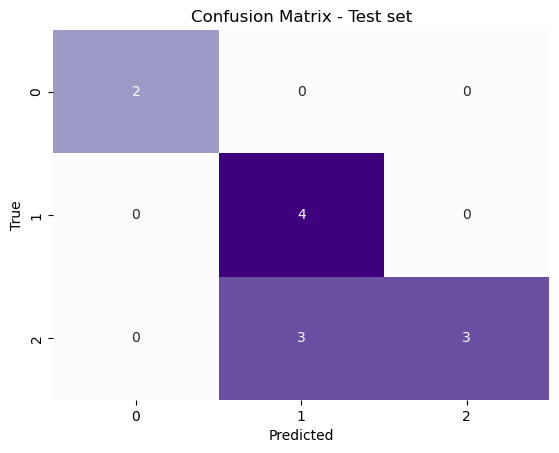

In [68]:
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_test_pred, average='weighted'))

cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Feature importances

The Gradient Boosting provides feature importance as the decision tree-based models because it is impractical to visualize at least 100 trees (default) (Müller and Guido, 2017, p.90). 

The chart below shows which features contribute the most to the model's predictions.

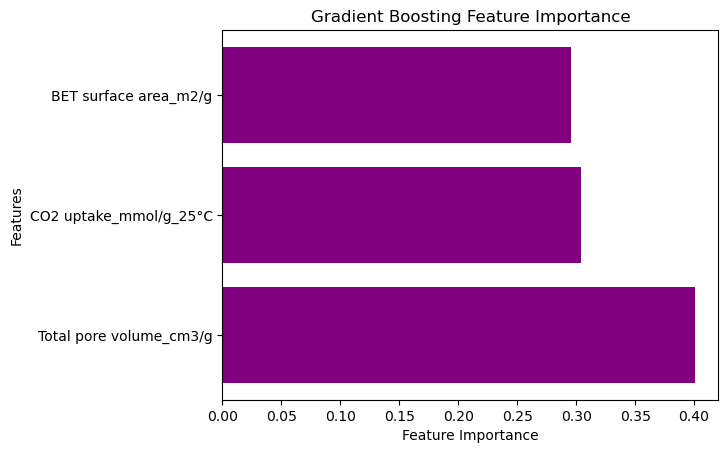

In [69]:
feature_imp = pd.Series(gb_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
bar_color = 'purple'
plt.barh(feature_imp.index, feature_imp, color=bar_color)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Feature Importance')
plt.show()

As we can see on the chart above, the 'Total pore volume' is the feature most relevant to the models' performance, followed by the 'CO2 uptake' and 'BET surface area'.

## Evaluation - Gradient Boosting (GB)

+------------+---------+--------+
| 10% test   |   Train |   Test |
+============+=========+========+
| Accuracy   |       1 |      1 |
+------------+---------+--------+
| Precision  |       1 |      1 |
+------------+---------+--------+
| Recall     |       1 |      1 |
+------------+---------+--------+
| F1 Score   |       1 |      1 |
+------------+---------+--------+
+------------+---------+--------+
| 20% test   |   Train |   Test |
+============+=========+========+
| Accuracy   |       1 |  0.75  |
+------------+---------+--------+
| Precision  |       1 |  0.857 |
+------------+---------+--------+
| Recall     |       1 |  0.75  |
+------------+---------+--------+
| F1 Score   |       1 |  0.74  |
+------------+---------+--------+
+------------+---------+--------+
| 30% test   |   Train |   Test |
+============+=========+========+
| Accuracy   |       1 | 0.6666 |
+------------+---------+--------+
| Precision  |       1 | 0.6879 |
+------------+---------+--------+
| Recall     |

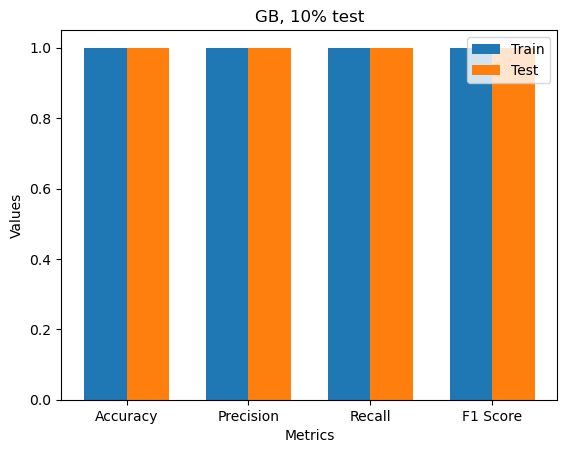

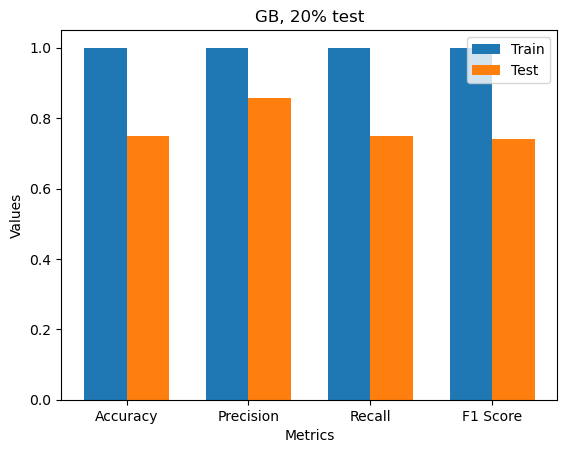

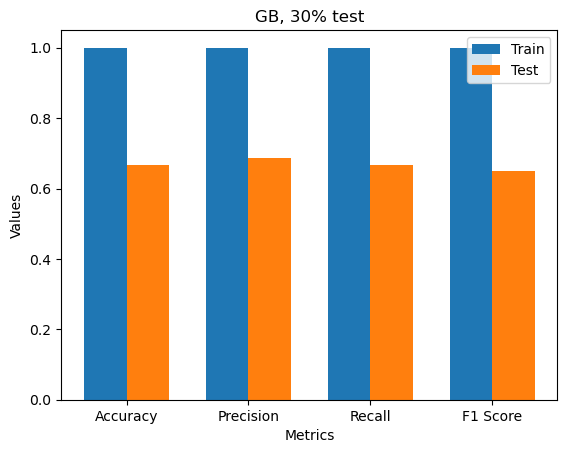

In [70]:
data = [
    ["Accuracy", 1.0, 1.0],
    ["Precision", 1.0, 1.0],
    ["Recall", 1.0, 1.0],
    ["F1 Score", 1.0, 1.0],
]   
headers = ["10% test", "Train", "Test"]

data1 = [
    ["Accuracy", 1.0, 0.75],
    ["Precision", 1.0, 0.857],
    ["Recall", 1.0, 0.75],
    ["F1 Score", 1.0, 0.74],
]   
headers1 = ["20% test", "Train", "Test"]

data2 = [
    ["Accuracy", 1.0, 0.6666],
    ["Precision", 1.0, 0.6879],
    ["Recall", 1.0, 0.6666],
    ["F1 Score", 1.0, 0.6508],
]   
headers2 = ["30% test", "Train", "Test"]
print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print(tabulate(data2, headers=headers2, tablefmt="grid"))

def plot_data(data, headers, title):
    categories = [row[0] for row in data]
    values_train = [row[1] for row in data]
    values_test = [row[2] for row in data]

    bar_width = 0.35
    index = np.arange(len(categories))

    fig, ax = plt.subplots()
    train_bars = ax.bar(index, values_train, bar_width, label="Train")
    test_bars = ax.bar(index + bar_width, values_test, bar_width, label="Test")

    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

plot_data(data, headers, "GB, 10% test")
plot_data(data1, headers1, "GB, 20% test")
plot_data(data2, headers2, "GB, 30% test")

The Gradient Boosting presented better performance than the k-NN model; however, the training set is likely to be overfitting because its accuracy is 100%, but when we see the test set, the split of 20% provided better metrics than the other. Thus, I will focus on the 20% test split for hyperparameters adjustment. 

In the next step, I will adjust hyperparameters like learning_rate that controls how strong each tree makes corrections of the previous trees, as well as the n_estimators and maximum depth that are the main parameters for this model (Müller and Guido, 2017, p.89,91). 

#### Adjusting hyperparameters

In [71]:
data = [
    ["Accuracy", 1.0, 0.67],
    ["Precision", 1.0, 0.71],
    ["Recall", 1.0, 0.67],
    ["F1 Score", 1.0, 0.67],
]   
headers = ["max_depth=1, n_estimators=100, learning_rate=0.1, 20% test", "Train", "Test"]

data1 = [
    ["Accuracy", 1.0, 0.75],
    ["Precision", 1.0, 0.86],
    ["Recall", 1.0, 0.75],
    ["F1 Score", 1.0, 0.74],
]   
headers1 = ["max_depth=2, n_estimators=100, learning_rate=0.1, 20% test", "Train", "Test"]

data2 = [
    ["Accuracy", 1.0, 0.67],
    ["Precision", 1.0, 0.78],
    ["Recall", 1.0, 0.67],
    ["F1 Score", 1.0, 0.67],
]   
headers2 = ["max_depth=3, n_estimators=100, learning_rate=0.1, 20% test", "Train", "Test"]

data3 = [
    ["Accuracy", 1.0, 0.75],
    ["Precision", 1.0, 0.68],
    ["Recall", 1.0, 0.75],
    ["F1 Score", 1.0, 0.74],
]   
headers3 = ["max_depth=4, n_estimators=100, learning_rate=0.1, 20% test", "Train", "Test"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))
print(tabulate(data2, headers=headers2, tablefmt="grid"))
print(tabulate(data3, headers=headers3, tablefmt="grid"))


+--------------------------------------------------------------+---------+--------+
| max_depth=1, n_estimators=100, learning_rate=0.1, 20% test   |   Train |   Test |
+==============================================================+=========+========+
| Accuracy                                                     |       1 |   0.67 |
+--------------------------------------------------------------+---------+--------+
| Precision                                                    |       1 |   0.71 |
+--------------------------------------------------------------+---------+--------+
| Recall                                                       |       1 |   0.67 |
+--------------------------------------------------------------+---------+--------+
| F1 Score                                                     |       1 |   0.67 |
+--------------------------------------------------------------+---------+--------+
+--------------------------------------------------------------+---------+--

The table above shows that the train set was overfitted for all 'max_depth' tested. However, the minimum 'max_depth=2' achieved the best values for the metrics in the test set, and this information will be used to evaluate if changing the 'learning_rate' will be possible to find better metrics inclusive for the training set.

+--------------------------------------------------------------+---------+--------+
| max_depth=2, n_estimators=100, learning_rate=0.1, 20% test   |   Train |   Test |
+==============================================================+=========+========+
| Accuracy                                                     |       1 |   0.75 |
+--------------------------------------------------------------+---------+--------+
| Precision                                                    |       1 |   0.86 |
+--------------------------------------------------------------+---------+--------+
| Recall                                                       |       1 |   0.75 |
+--------------------------------------------------------------+---------+--------+
| F1 Score                                                     |       1 |   0.74 |
+--------------------------------------------------------------+---------+--------+
+---------------------------------------------------------------+---------+-

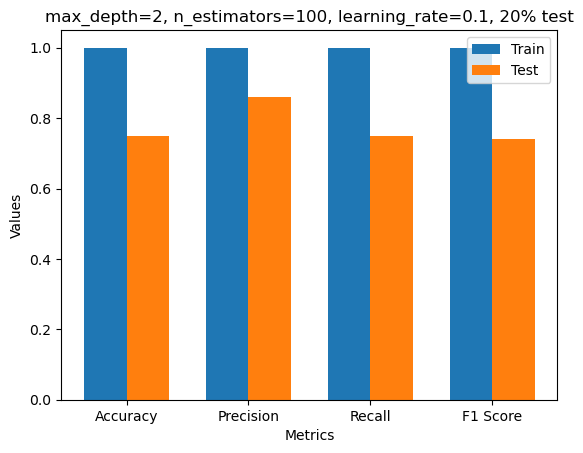

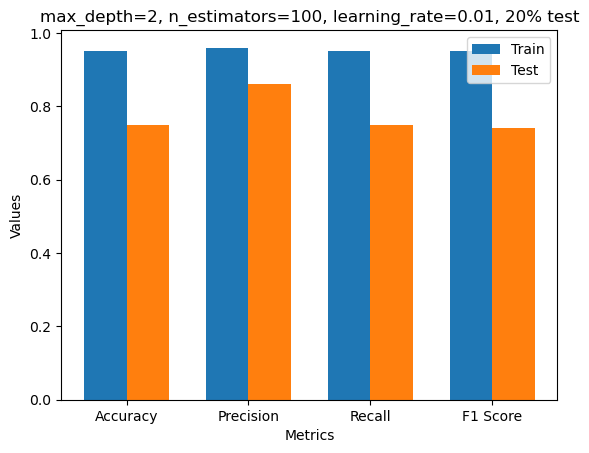

In [72]:
data = [
    ["Accuracy", 1.0, 0.75],
    ["Precision", 1.0, 0.86],
    ["Recall", 1.0, 0.75],
    ["F1 Score", 1.0, 0.74],
]   
headers = ["max_depth=2, n_estimators=100, learning_rate=0.1, 20% test", "Train", "Test"]

data1 = [
    ["Accuracy", 0.95, 0.75],
    ["Precision", 0.96, 0.86],
    ["Recall", 0.95, 0.75],
    ["F1 Score", 0.95, 0.74],
]   
headers1 = ["max_depth=2, n_estimators=100, learning_rate=0.01, 20% test", "Train", "Test"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print(tabulate(data1, headers=headers1, tablefmt="grid"))

def plot_data(data, headers, title):
    categories = [row[0] for row in data]
    values_train = [row[1] for row in data]
    values_test = [row[2] for row in data]

    bar_width = 0.35
    index = np.arange(len(categories))

    fig, ax = plt.subplots()
    train_bars = ax.bar(index, values_train, bar_width, label="Train")
    test_bars = ax.bar(index + bar_width, values_test, bar_width, label="Test")

    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend()

    plt.show()

plot_data(data, headers, "max_depth=2, n_estimators=100, learning_rate=0.1, 20% test")
plot_data(data1, headers1, "max_depth=2, n_estimators=100, learning_rate=0.01, 20% test")

As we can see on the table and charts above the 'learning_rate=0.01' resulted in a model that is can generalize well without overfitting.

## Models assessment

Now, I will compare the two models (k-NN and GB), considering the best setting obtained for each one.

The chart below shows that despite the trials to improve the k-NN models' performance, it resulted in poorly performance in both training and test sets, meaning that this model is not capable of generalising well because it is underfitting, probability because the model is basic and the amount of data is too small.

Regarding the Gradient Boosting, we can see a significant improvement in comparison with k-NN, mainly for the accuracy that increased 17.22% in the training set and 8.33% in the test set. It suggests that this model can generalise well; however, the test set has room for improvement. In addition, the 'Total pore volume'  was the feature that contributed most to the model's predictions, followed by the 'CO2 uptake' and 'BET surface area'.

+-----------+--------+------+
| Metrics   |   k-NN |   GB |
+===========+========+======+
| Acc_Tr    | 0.7778 | 0.95 |
+-----------+--------+------+
| Acc_Te    | 0.6667 | 0.75 |
+-----------+--------+------+
| Prec_Tr   | 0.7766 | 0.96 |
+-----------+--------+------+
| Prec_Te   | 0.8889 | 0.86 |
+-----------+--------+------+
| Rec_Tr    | 0.7778 | 0.95 |
+-----------+--------+------+
| Rec_Te    | 0.6667 | 0.75 |
+-----------+--------+------+
| F1_Tr     | 0.7703 | 0.95 |
+-----------+--------+------+
| F1_Te     | 0.6667 | 0.74 |
+-----------+--------+------+
k-NN: n_neighbors=3, metric='manhattan', 20% test
GB: max_depth=2, n_estimators=100, learning_rate=0.01, 20% test


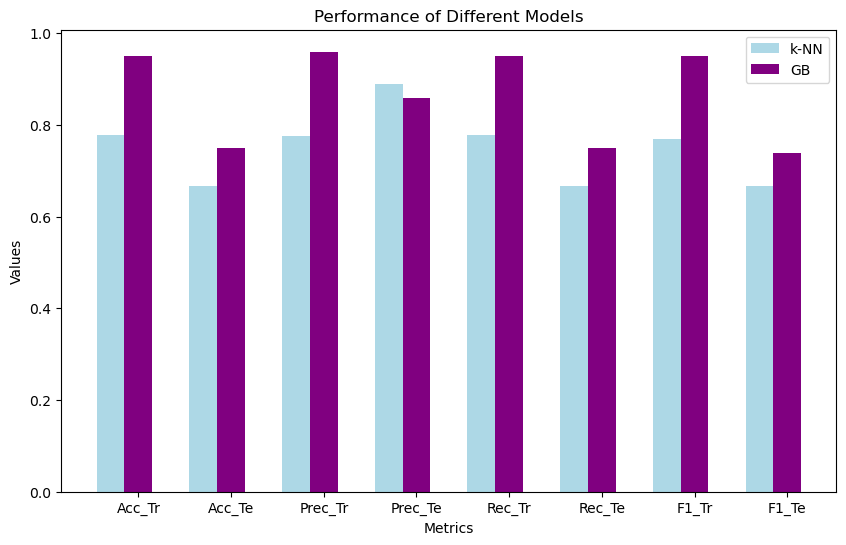

In [73]:
data = [
    ["Acc_Tr", 0.7778, 0.95],
    ["Acc_Te", 0.6667, 0.75],
    ["Prec_Tr", 0.7766, 0.96],
    ["Prec_Te", 0.8889, 0.86],
    ["Rec_Tr", 0.7778, 0.95],
    ["Rec_Te", 0.6667, 0.75],
    ["F1_Tr", 0.7703, 0.95],
    ["F1_Te", 0.6667, 0.74],
]
headers = ["Metrics", "k-NN", "GB"]
print(tabulate(data, headers=headers, tablefmt="grid"))
print("k-NN: n_neighbors=3, metric='manhattan', 20% test")
print("GB: max_depth=2, n_estimators=100, learning_rate=0.01, 20% test")

parameters = [row[0] for row in data]
values_kNN = [row[1] for row in data]
values_GB = [row[2] for row in data]

bar_width = 0.3
index = np.arange(len(parameters))
figsize = (10,6)
plt.figure(figsize=figsize)

plt.bar(index, values_kNN, width=bar_width, label=headers[1], color='lightblue')
plt.bar(index + bar_width, values_GB, width=bar_width, label=headers[2], color='purple')
#plt.bar(index + 2 * bar_width, values_RF_PCA, width=bar_width, label=headers[3])

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance of Different Models')
plt.xticks(index + bar_width, parameters)
plt.legend()
plt.show()

## Grid Search to Find Optimal Hyperparameters - GB

In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'max_depth': [1, 2, 3, 5, 7, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4], 
    'min_samples_split': [2, 3],
    'subsample': [0.1, 0.3, 0.5, 0.8]
}
# Create a based model
gb_clf = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gb_clf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)

The code below fits the grid search to the data. As running takes a lot of time, I used the # simbol to avoid it.  

In [75]:
#grid_search.fit(X_train, y_train)

Below will print the optimal accuracy score and hyperparameters

In [76]:
#print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 3), (12, 3), (45,), (12,))

In [78]:
gb_clf = GradientBoostingClassifier(learning_rate=0.03, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1, random_state=12)

y_train_pred = cross_val_predict(gb_clf, X_train, y_train, cv=5)

In [79]:
gb_clf.fit(X_train, y_train)

y_train_pred = gb_clf.predict(X_train)

y_test_pred = gb_clf.predict(X_test)

Training Set Metrics:
Accuracy: 0.8
Precision: 0.8051851851851852
Recall: 0.8
F1-Score: 0.7909837289147633


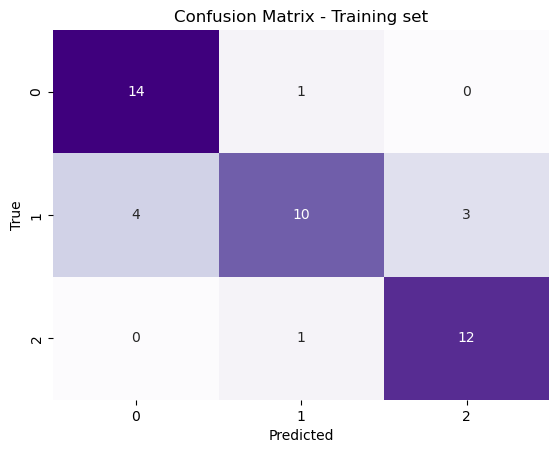

In [80]:
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("F1-Score:", f1_score(y_train, y_train_pred, average='weighted'))

cm_test = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_test, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.title('Confusion Matrix - Training set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Test Set Metrics:
Accuracy: 0.8333333333333334
Precision: 0.9166666666666666
Recall: 0.8333333333333334
F1-Score: 0.8333333333333334


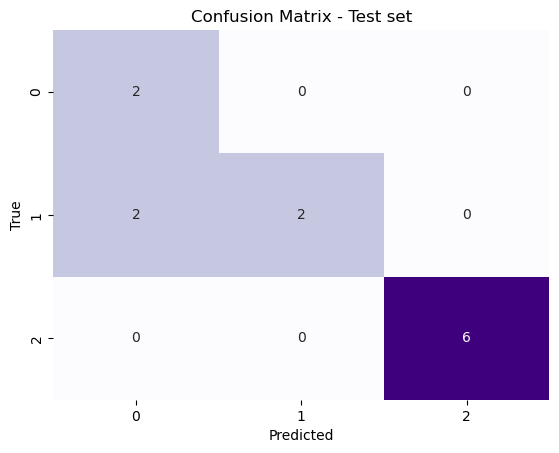

In [81]:
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_test_pred, average='weighted'))

cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, cmap='Purples', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

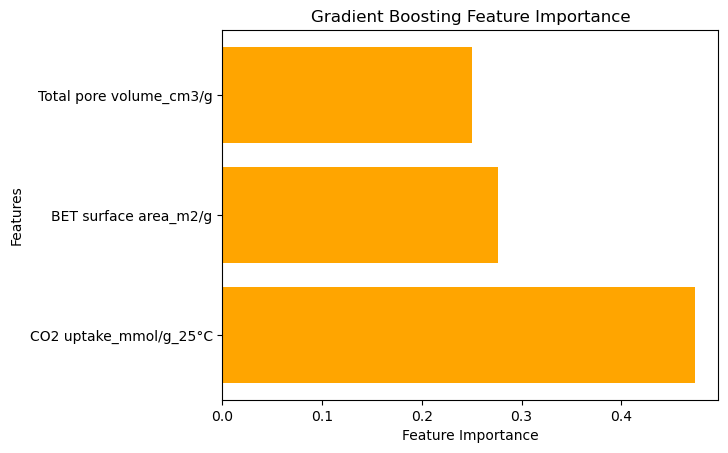

In [82]:
feature_imp = pd.Series(gb_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
bar_color = 'orange'
plt.barh(feature_imp.index, feature_imp, color=bar_color)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Gradient Boosting Feature Importance')
plt.show()

As we can see in the chart above, the hyperparameter adjustments improved inclusively the feature's importance. In this case, CO2 was the main feature that contributed to the model's performance.

#### Results of Grid search - GB

+---------------------+---------+--------+
| Metrics, 20% test   |   Train |   Test |
+=====================+=========+========+
| Accuracy            |   0.8   | 0.833  |
+---------------------+---------+--------+
| Precision           |   0.805 | 0.916  |
+---------------------+---------+--------+
| Recall              |   0.8   | 0.833  |
+---------------------+---------+--------+
| F1 Score            |   0.79  | 0.8333 |
+---------------------+---------+--------+
Grid Search - GB: learning_rate=0.03, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1


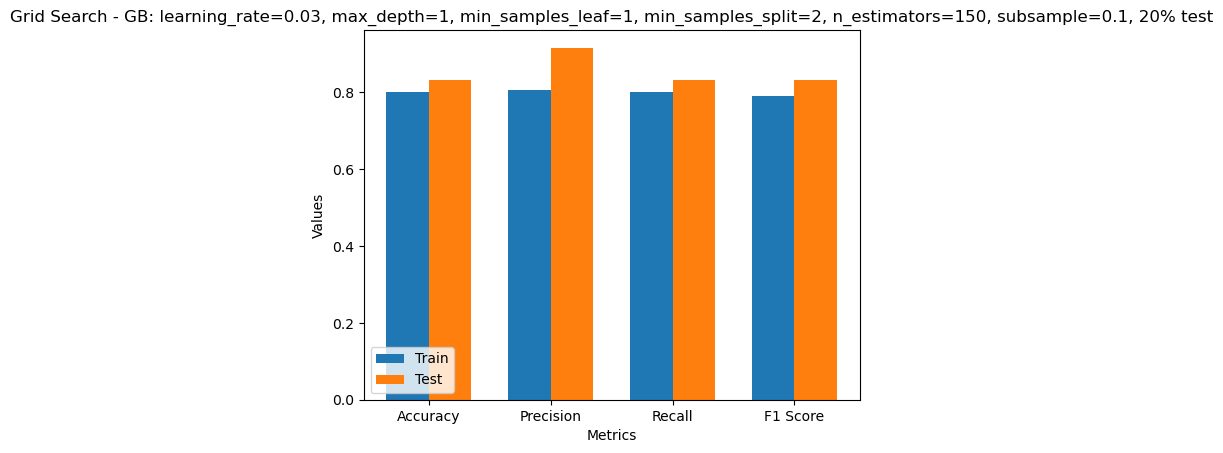

In [83]:
data = [
    ["Accuracy", 0.8, 0.833],
    ["Precision", 0.805, 0.916],
    ["Recall", 0.8, 0.833],
    ["F1 Score", 0.790, 0.8333],
]   
headers = ["Metrics, 20% test", "Train", "Test"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print("Grid Search - GB: learning_rate=0.03, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1")

def plot_data(data, headers, title):
    categories = [row[0] for row in data]
    values_train = [row[1] for row in data]
    values_test = [row[2] for row in data]

    bar_width = 0.35
    index = np.arange(len(categories))

    fig, ax = plt.subplots()
    train_bars = ax.bar(index, values_train, bar_width, label="Train")
    test_bars = ax.bar(index + bar_width, values_test, bar_width, label="Test")

    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend(loc='lower left')

    plt.show()

plot_data(data, headers, "Grid Search - GB: learning_rate=0.03, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1, 20% test")

## Gradient Boosting - SMOTE 

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 3), (12, 3), (45,), (12,))

I am Applying SMOTE to the training set only. If I apply it to the entire dataset, it will result in an overfit of the negative class, which will generate excellent metrics but not in accordance with the real dataset.

In [86]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train_resampled.shape, y_train_resampled.shape

((48, 3), (48,))

I will use the code below to call the Gradient Boosting Classifier with the data balanced (SMOTE), and then I will train the model using the training sets and make predictions on the test set.

In [87]:
gb_clf_smote = GradientBoostingClassifier(learning_rate=0.03, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1, random_state=12)

y_train_pred = cross_val_predict(gb_clf_smote, X_train_resampled, y_train_resampled, cv=5)

In [88]:
gb_clf_smote.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.03, max_depth=1, n_estimators=150,
                           random_state=12, subsample=0.1)

Making predictions on the test set.

In [89]:
y_pred_smote = gb_clf_smote.predict(X_test)

Making predictions on the training set.

In [90]:
y_train_pred_smote = gb_clf_smote.predict(X_train_resampled)

####  Training Set Metrics  - SMOTE - GB

In [91]:
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train_resampled, y_train_pred_smote))
print("Precision:", precision_score(y_train_resampled, y_train_pred_smote, average='weighted'))
print("Recall:", recall_score(y_train_resampled, y_train_pred_smote, average='weighted'))
print("F1-Score:", f1_score(y_train_resampled, y_train_pred_smote, average='weighted'))

Training Set Metrics:
Accuracy: 0.8958333333333334
Precision: 0.9008940620782727
Recall: 0.8958333333333334
F1-Score: 0.8931239737274219


####  Test Set Metrics  - SMOTE - GB

In [92]:
from sklearn import metrics
print("\nTest Set Metrics:")
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred_smote)) )
print( "precision: {:.2f}".format(metrics.precision_score(y_test, y_pred_smote, average='weighted')) )
print( "recall: {:.2f}".format(metrics.recall_score(y_test, y_pred_smote, average='weighted')) )
print( "F1 Score: {:.2f}".format(metrics.f1_score(y_test, y_pred_smote, average='weighted')) )


Test Set Metrics:
Accuracy: 0.92
precision: 0.93
recall: 0.92
F1 Score: 0.92


####  Accuracy - SMOTE - GB - train and test 

In [93]:
print("Training Accuracy :", gb_clf_smote.score(X_train, y_train))
print("Testing Accuracy :", gb_clf_smote.score(X_test, y_test))

Training Accuracy : 0.8888888888888888
Testing Accuracy : 0.9166666666666666


####  Feature Importance - SMOTE - GB

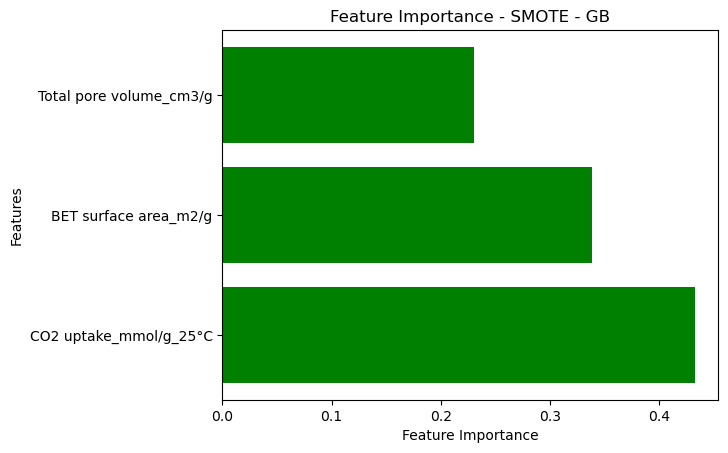

In [94]:
feature_imp = pd.Series(gb_clf_smote.feature_importances_, index=X.columns).sort_values(ascending=False)
bar_color = 'green'
plt.barh(feature_imp.index, feature_imp, color=bar_color)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - SMOTE - GB')
plt.show()

Text(50.72222222222221, 0.5, 'Actual')

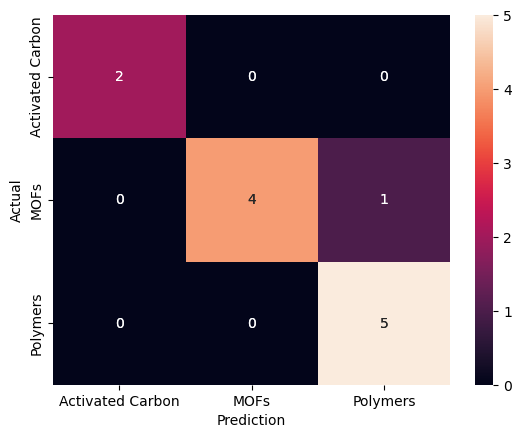

In [95]:
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True)
ax = sns.heatmap(cm, annot=True,                  
                 xticklabels=['Activated Carbon', 'MOFs', 'Polymers'],                
                 yticklabels=['Activated Carbon', 'MOFs', 'Polymers'],                  
                 cbar=False)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

+--------------------+---------+--------+
| Metrics, 20%test   |   Train |   Test |
+====================+=========+========+
| Accuracy           |   0.895 |   0.92 |
+--------------------+---------+--------+
| Precision          |   0.9   |   0.93 |
+--------------------+---------+--------+
| Recall             |   0.895 |   0.92 |
+--------------------+---------+--------+
| F1 Score           |   0.893 |   0.92 |
+--------------------+---------+--------+
Grid Search - GB: learning_rate=0.03, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1


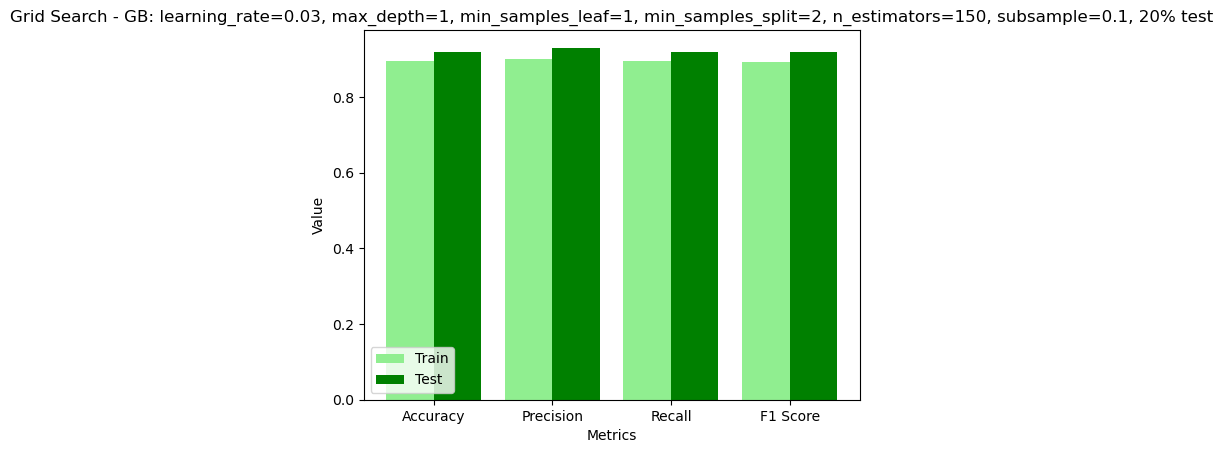

In [96]:
data = [
    ["Accuracy", 0.895, 0.92],
    ["Precision", 0.900, 0.93],
    ["Recall", 0.895, 0.92],
    ["F1 Score", 0.893, 0.92],
]   
headers = ["Metrics, 20%test", "Train", "Test"]

print(tabulate(data, headers=headers, tablefmt="grid"))
print("Grid Search - GB: learning_rate=0.03, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1")

def plot_data(data, headers, title):
    categories = [row[0] for row in data]
    values_train = [row[1] for row in data]
    values_test = [row[2] for row in data]

    bar_width = 0.4
    index = np.arange(len(categories))

    fig, ax = plt.subplots()
    train_bars = ax.bar(index, values_train, bar_width, color="lightgreen", label="Train")
    test_bars = ax.bar(index + bar_width, values_test, bar_width, color="green", label="Test")

    ax.set_xlabel("Metrics")
    ax.set_ylabel("Value")
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(categories)
    ax.legend(loc='lower left')

plot_data(data, headers, "Grid Search - GB: learning_rate=0.03, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1, 20% test")

## Conclusion

I found that the Gradient Boosting performed better than k-NN using the SMOTE and under these conditions (learning_rate=0.03, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.1, 20% test) including cross-validation and I also used to Grid Search that gave the optimal hyperparameters.

I achieved a training accuracy (0.89) lower than the testing accuracy (0.92), suggesting that the model does not overfit the training data, which is a good sign, and similar results were encountered in the other metrics that can corroborate it. In other words, they present the ability to correctly identify positive instances, which is essential in the present model because the objective is to predict the correct material given a specific CO2 value. The test set can also generalize well unseen data. However, it will be necessary to increase the sample size, mainly to enhance the confiability of the results. 

## Reference

Chawla, N.V. (2009). Data Mining for Imbalanced Datasets: An Overview. In: Data Mining and Knowledge Discovery Handbook. [online] pp.875–886. doi:https://doi.org/10.1007/978-0-387-09823-4_45.

Devore, J.L. (2012). Probability and Statistics for Engineering and the Sciences. 8th ed. Boston, MA: Brooks/Cole Pub Co.

Dziejarski, B., Serafin, J., Andersson, K. and Krzyżyńska, R. (2023). CO2 capture materials: a review of current trends and future challenges. Materials Today Sustainability, 24, p.100483. doi:https://doi.org/10.1016/j.mtsust.2023.100483.

Müller, A. C. and Guido, S. (2017). *Introduction to machine learning with Python: a guide for data scientists*. 1st ed. United States of America. O’reilly Media.

scikit-learn. (n.d.). sklearn.preprocessing.RobustScaler. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler [Accessed 2 Dec. 2023].